# Import all library 

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.utils import to_categorical

# loading the MNIST dataset

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 &1

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to have a single channel for grayscale images

In [5]:
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# One-hot encode the labels

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the Model

In [13]:
model = Sequential()
model.add(Dense(50, input_dim=784, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# optimizer
optm = SGD(learning_rate=0.01, momentum=0.9)

# compiler
model.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 50)                39250     
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 39960 (156.09 KB)
Trainable params: 39860 (155.70 KB)
Non-trainable params: 100 (400.00 Byte)
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0880 - accuracy: 0.9725 - val_loss: 0.0909 - val_accuracy: 0.9721
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0825 - accuracy: 0.9748 - val_loss: 0.1009 - val_accuracy: 0.9700
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0764 - accuracy: 0.9760 - val_loss: 0.0972 - val_accuracy: 0.9713
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9765 - val_loss: 0.0829 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9780 - val_loss: 0.0879 - val_accuracy: 0.9747
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9799 - val_loss: 0.0880 - val_accuracy: 0.9747
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0631 - accuracy: 0.9799 - val_loss: 0.0822 - val_accuracy:

# Evaluate the model

In [18]:
_,train_acc=model.evaluate(x_train,y_train,verbose=1)
_,test_acc=model.evaluate(x_test,y_test,verbose=1)
print('Train Accuracy:\t',train_acc)
print()
print('Test Accuracy:\t',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9728
Train Accuracy:	 0.9898166656494141

Test Accuracy:	 0.9728000164031982


# Plot the Results

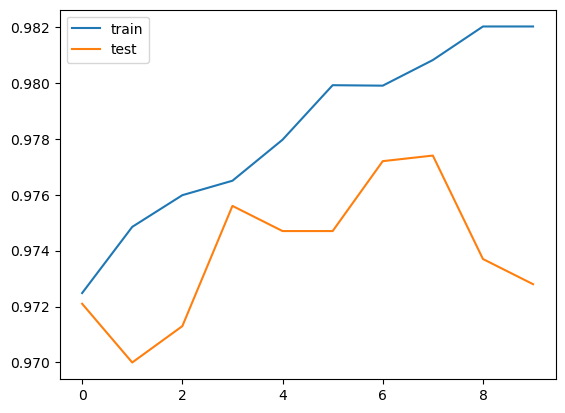

In [19]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()
